In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt


0. Prepare data
1. Model 
2. Loss and optimizer 
3. Training Loop 


In [2]:
# 0. Prepare Data
x,y = datasets.make_regression(n_samples=100,n_features=1,noise = 20, random_state=1)

x = torch.from_numpy(x.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32)).view(-1,1)

n_samples, n_features = x.shape


In [3]:
# 1. Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size,output_size)


In [4]:
# 2. loss and optimizer
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [5]:
# 3. Training Loop
n_epoch = 100
for epochs in range(n_epoch):
    #forward pass and loss
    y_predicted = model(x)
    loss = criterion(y_predicted,y)
    
    #backward pass
    loss.backward()

    #update
    optimizer.step()

    #empty gradients
    optimizer.zero_grad()

    if (epochs+1) % 10 == 0:
        print(f'epoch : {epochs+1}, loss = {loss.item():.8f}')


epoch : 10, loss = 4309.20410156
epoch : 20, loss = 3217.67651367
epoch : 30, loss = 2427.56567383
epoch : 40, loss = 1855.04467773
epoch : 50, loss = 1439.79284668
epoch : 60, loss = 1138.34228516
epoch : 70, loss = 919.32666016
epoch : 80, loss = 760.08306885
epoch : 90, loss = 644.21881104
epoch : 100, loss = 559.86401367


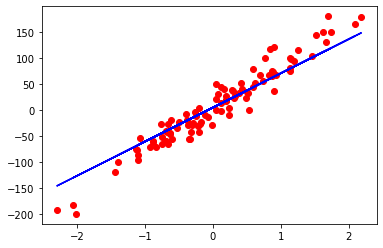

In [6]:
#plot
%matplotlib inline
predicted = model(x).detach().numpy() #do not want this to be a part of our computational graph, also convert to numpy for plotting
x_numpy = x.numpy()
y_numpy = y.numpy()

plt.plot(x_numpy, y_numpy, 'ro')
plt.plot(x_numpy,predicted,'b')
plt.show()